In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Users/samir/Downloads/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

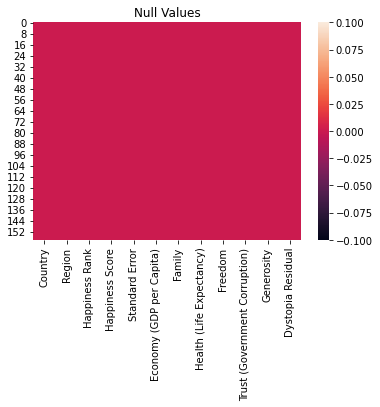

In [4]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

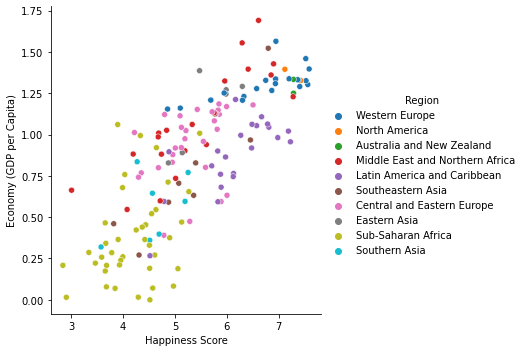

<Figure size 1440x1080 with 0 Axes>

In [5]:
sns.relplot(x = 'Happiness Score', y = 'Economy (GDP per Capita)' , data = df, hue = 'Region')
plt.figure(figsize = [20,15])
plt.show()

In [6]:
gdp = df.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

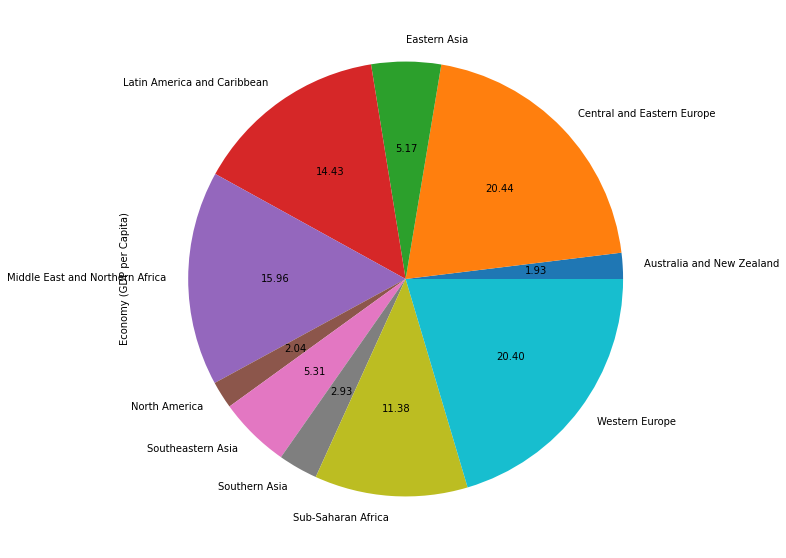

In [7]:
gdp.plot.pie(figsize = (15,10), fontsize = 10, autopct = '%.2f')
plt.show()

In [8]:
total_country = df.groupby('Region')['Country'].count()
print(total_country)

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: Country, dtype: int64


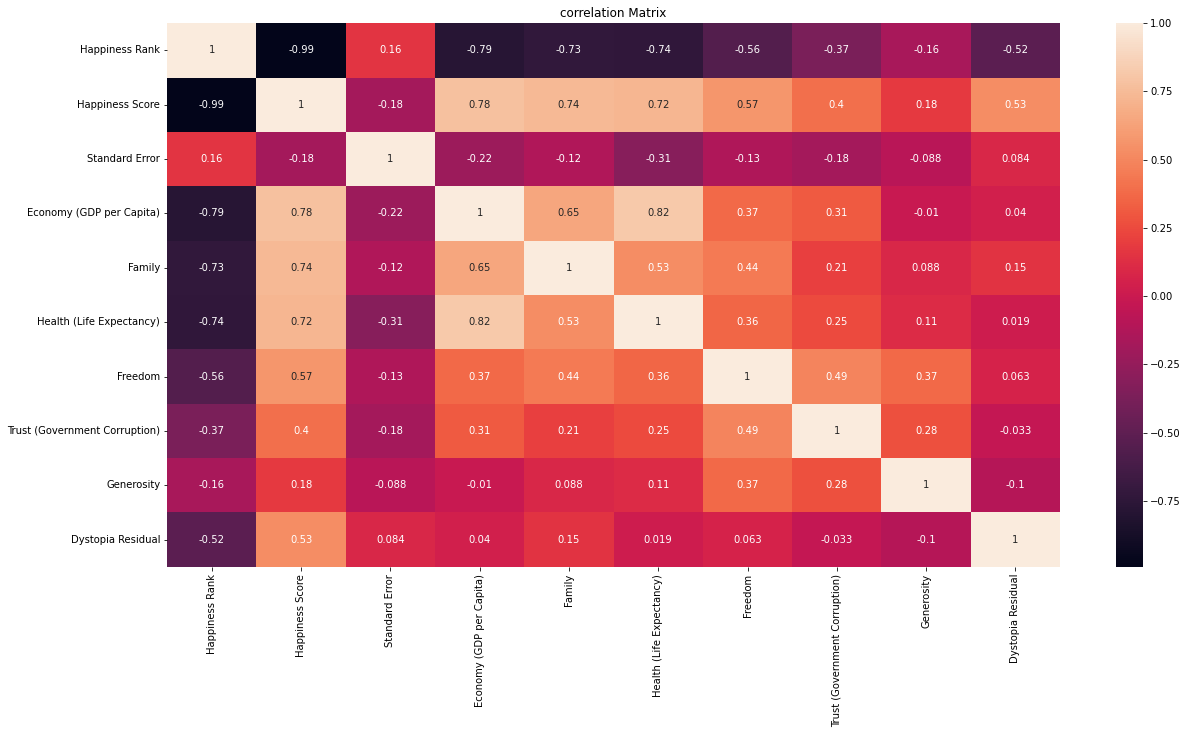

In [9]:
corr_mat = df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

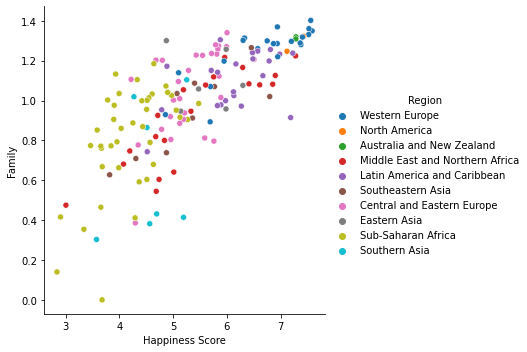

<Figure size 1440x1080 with 0 Axes>

In [10]:
sns.relplot(x = 'Happiness Score', y = 'Family' , data = df, hue = 'Region')
plt.figure(figsize = [20, 15])
plt.show()

In [11]:
family= df.groupby('Region')['Family'].sum()
family

Region
Australia and New Zealand           2.62890
Central and Eastern Europe         30.53823
Eastern Asia                        6.59656
Latin America and Caribbean        24.30385
Middle East and Northern Africa    18.40980
North America                       2.56972
Southeastern Asia                   8.46421
Southern Asia                       4.51725
Sub-Saharan Africa                 32.36340
Western Europe                     26.19334
Name: Family, dtype: float64

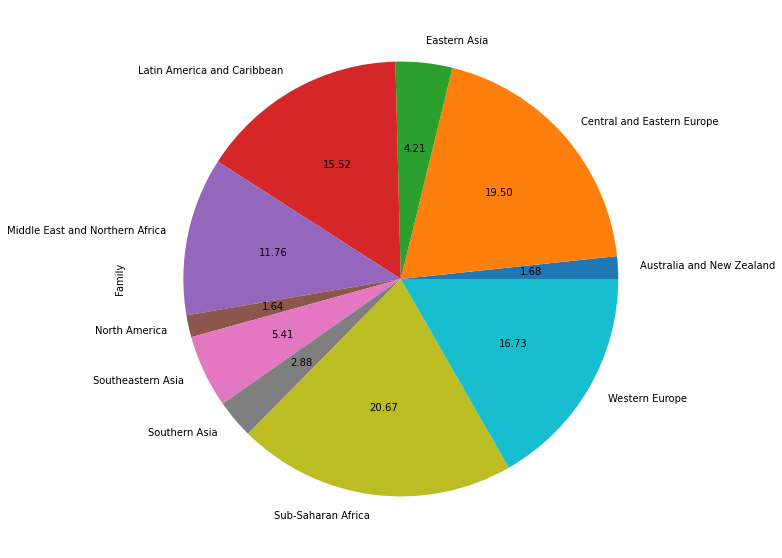

In [12]:
family.plot.pie(figsize = (15,10), fontsize = 10, autopct = '%.2f')
plt.show()

In [13]:
health= df.groupby('Region')['Health (Life Expectancy)'].sum()
health

Region
Australia and New Zealand           1.83993
Central and Eastern Europe         20.84444
Eastern Asia                        5.26433
Latin America and Caribbean        15.48515
Middle East and Northern Africa    14.11231
North America                       1.76742
Southeastern Asia                   6.09621
Southern Asia                       3.78581
Sub-Saharan Africa                 11.29327
Western Europe                     19.09211
Name: Health (Life Expectancy), dtype: float64

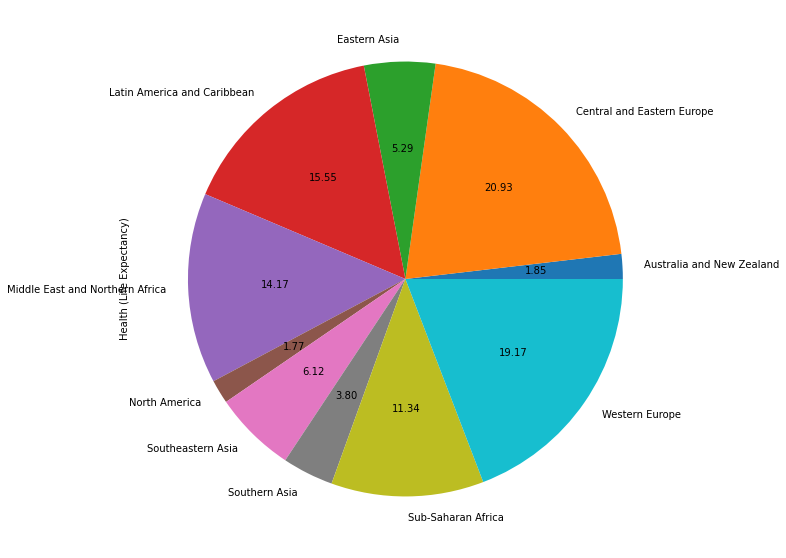

In [14]:
health.plot.pie(figsize = (15,10), fontsize = 10, autopct = '%.2f')
plt.show()

In [15]:
freedom= df.groupby('Region')['Freedom'].sum()
freedom

Region
Australia and New Zealand           1.29062
Central and Eastern Europe         10.38979
Eastern Asia                        2.77494
Latin America and Caribbean        11.03827
Middle East and Northern Africa     7.23502
North America                       1.17901
Southeastern Asia                   5.01394
Southern Asia                       2.61336
Sub-Saharan Africa                 14.63776
Western Europe                     11.54845
Name: Freedom, dtype: float64

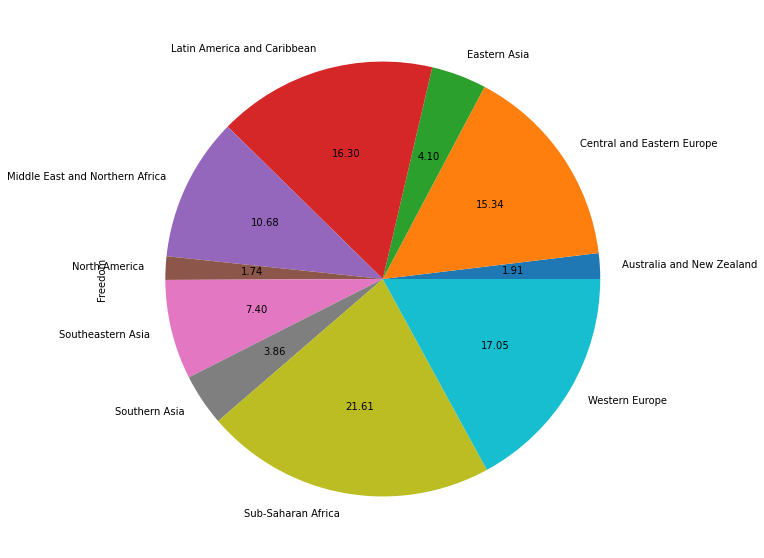

In [16]:
freedom.plot.pie(figsize = (15,10), fontsize = 10, autopct = '%.2f')
plt.show()

In [17]:
trust= df.groupby('Region')['Trust (Government Corruption)'].sum()
trust

Region
Australia and New Zealand          0.78559
Central and Eastern Europe         2.51354
Eastern Asia                       0.76617
Latin America and Caribbean        2.57778
Middle East and Northern Africa    3.63404
North America                      0.48847
Southeastern Asia                  1.36148
Southern Asia                      0.71775
Sub-Saharan Africa                 4.95511
Western Europe                     4.86072
Name: Trust (Government Corruption), dtype: float64

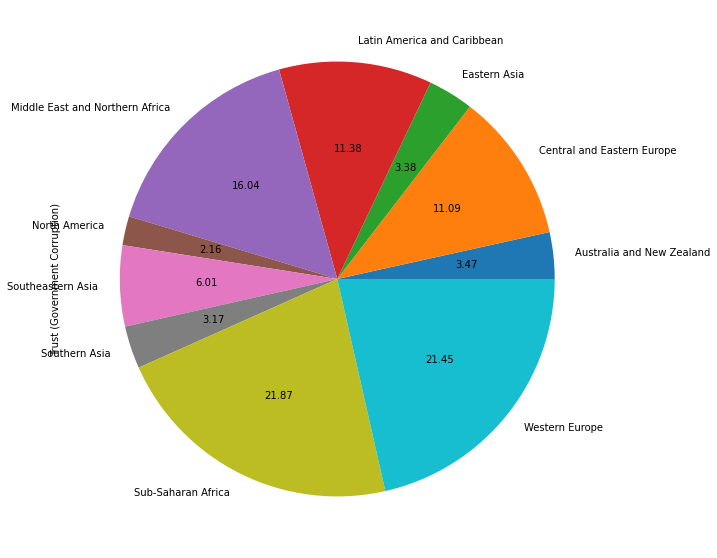

In [18]:
trust.plot.pie(figsize = (15,10), fontsize = 10, autopct = '%.2f')
plt.show()

In [19]:
gene= df.groupby('Region')['Generosity'].sum()
gene

Region
Australia and New Zealand          0.91063
Central and Eastern Europe         4.41565
Eastern Asia                       1.35531
Latin America and Caribbean        4.79133
Middle East and Northern Africa    3.80751
North America                      0.85916
Southeastern Asia                  3.77335
Southern Asia                      2.39000
Sub-Saharan Africa                 8.84547
Western Europe                     6.34428
Name: Generosity, dtype: float64

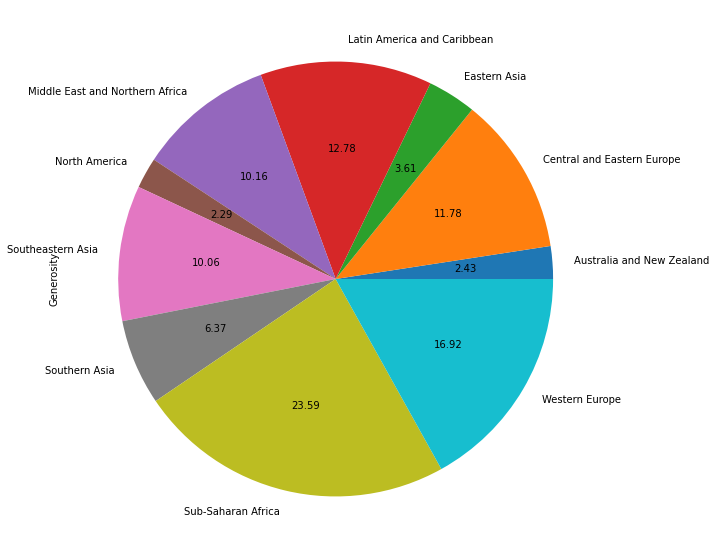

In [20]:
gene.plot.pie(figsize = (15,10), fontsize = 10, autopct = '%.2f')
plt.show()

In [21]:
dystopia= df.groupby('Region')['Dystopia Residual'].sum()
dystopia

Region
Australia and New Zealand           4.53071
Central and Eastern Europe         58.62059
Eastern Asia                       10.08964
Latin America and Caribbean        57.69670
Middle East and Northern Africa    39.60017
North America                       4.96187
Southeastern Asia                  16.04718
Southern Asia                      14.11738
Sub-Saharan Africa                 80.79920
Western Europe                     45.17489
Name: Dystopia Residual, dtype: float64

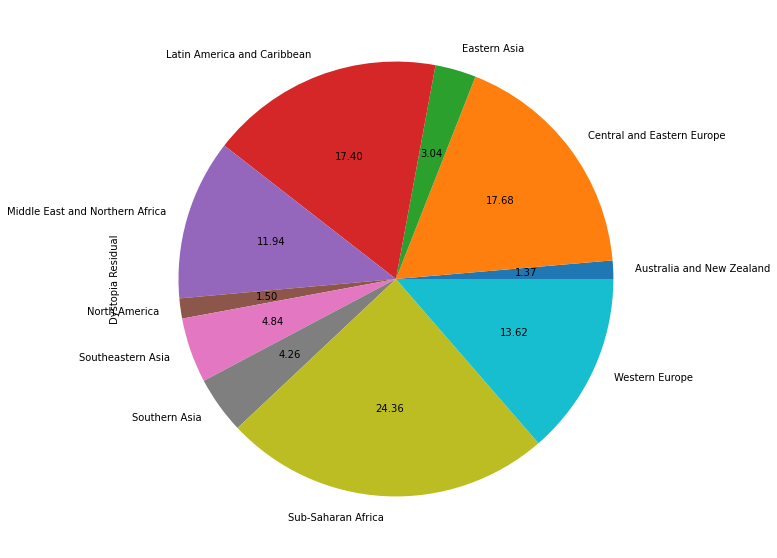

In [22]:
dystopia.plot.pie(figsize = (15,10), fontsize = 10, autopct = '%.2f')
plt.show()

In [23]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [24]:
train = df.drop(['Happiness Rank','Standard Error','Country','Region'],axis=1)
test = df['Happiness Score']

In [25]:
x_train,x_test, y_train,y_test = train_test_split(train, test, test_size=0.3, random_state=3)

In [26]:
regression = LinearRegression()

In [27]:
regression.fit(x_train, y_train)

LinearRegression()

In [28]:
predict = regression.predict(x_test)
predict

array([5.889, 7.522, 6.168, 6.485, 5.477, 5.855, 6.75 , 7.378, 6.123,
       5.589, 6.983, 4.369, 4.694, 6.295, 4.857, 4.292, 5.695, 6.13 ,
       2.905, 4.518, 5.073, 5.975, 5.605, 4.949, 3.655, 5.129, 7.406,
       3.931, 3.781, 5.429, 7.427, 4.55 , 7.2  , 7.119, 6.786, 5.007,
       5.399, 7.286, 6.611, 4.61 , 4.218, 4.839, 4.033, 4.252, 6.003,
       4.507, 6.81 , 6.94 ])

In [29]:
regression.score(x_test, y_test)

1.0